# Perform Exploratory Data Analysis

In [1]:
#load necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [4]:
len(df)
df['sqft_living'].min()

370

In [5]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df.isna().sum()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df[df['sqft_basement'] == '?'] = np.nan
df['sqft_basement'] = df['sqft_basement'].map(float)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [9]:
df.isna().sum()

id                454
date              454
price             454
bedrooms          454
bathrooms         454
sqft_living       454
sqft_lot          454
floors            454
waterfront        454
view              454
condition         454
grade             454
sqft_above        454
sqft_basement     454
yr_built          454
yr_renovated     4208
zipcode           454
lat               454
long              454
sqft_living15     454
sqft_lot15        454
dtype: int64

In [10]:
df = df.dropna(subset=['id'])

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
seattle_zips = pd.read_csv('seattle_zips.csv')
df_test = pd.merge(df, seattle_zips, how = 'left', left_on = 'zipcode', right_on = 'Zip')

In [13]:
df_1 = df_test.drop('Title', axis = 1)
df_2 = df_1.drop('Unnamed: 2', axis = 1)
df_3 = df_2.drop('Unnamed: 3', axis = 1)
df = df_3

In [14]:
df['Test'] = df['Zip'].fillna(0)
df['Seattle Zip'] = df['Test'].apply(lambda x: 0 if x == 0 else 1)

df_4 = df.drop('Test', axis=1)
df_5 = df_4.drop('Zip', axis=1)
df = df_5

In [15]:
df.head()  #Seattle Zip = 1  --> MEANS the zip code is in Seattle

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,770.0,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0


In [16]:
df['month'] = df['date'].apply(lambda x: x[-7:-5])
df['month2'] = df['month'].apply(lambda x: int(x[-1]) if x[0] == '/' else int(x))
temp_df = df.drop('month', axis=1) 
temp_df.rename(columns={'month2':'month'}, inplace=True)
df = temp_df
df.head(10)    #Added month column... this is MONTH OF SALE. can be used for seasonality


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip,month
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1,13
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1,9
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0,25
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1,9
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0,18
5,7.237550e+09,5/12/2014,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0,0,12
6,2.008000e+09,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,...,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,1,15
7,2.414600e+09,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,...,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,1,15
8,3.793500e+09,3/12/2015,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,...,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,0,12
9,1.736801e+09,4/3/2015,662500.0,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,...,1700.0,1965.0,0.0,98007.0,47.6007,-122.145,2210.0,8925.0,0,3


In [17]:
df['year'] = df['date'].apply(lambda x: int(x[-4:]))
df.head()  #Added year column... this is YEAR OF SALE. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Seattle Zip,month,year
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1,13,2014
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1,9,2014
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,1933.0,NaN,98028.0,47.7379,-122.233,2720.0,8062.0,0,25,2015
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1,9,2014
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0,18,2015


In [18]:
df['house_age'] = df.apply(lambda x: int(x['year'] - x['yr_built']), axis = 1)
df.head(50).T  #Added house_age in years

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
id,7.1293e+09,6.4141e+09,5.6315e+09,2.4872e+09,1.9544e+09,7.23755e+09,2.008e+09,2.4146e+09,3.7935e+09,1.7368e+09,...,9.2702e+09,1.4327e+09,8.03535e+09,8.9452e+09,4.1783e+09,9.2154e+09,8.22039e+08,5.2456e+09,7.2313e+09,7.51851e+09
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,1/15/2015,4/15/2015,3/12/2015,4/3/2015,...,10/28/2014,7/29/2014,7/18/2014,3/25/2015,7/16/2014,4/28/2015,3/11/2015,9/16/2014,2/17/2015,12/31/2014
price,221900,538000,180000,604000,510000,1.23e+06,291850,229500,323000,662500,...,685000,309000,488000,210490,785000,450000,1.35e+06,228000,345000,600000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,3,3,4,3,3,3,5,3
bathrooms,1,2.25,1,3,2,4.5,1.5,1,2.5,2.5,...,1,1,2.5,1,2.5,1.75,2.5,1,2.5,1.75
sqft_living,1180,2570,770,1960,1680,5420,1060,1780,1890,3560,...,1570,1280,3160,990,2290,1250,2753,1190,3150,1410
sqft_lot,5650,7242,10000,5000,8080,101930,9711,7470,6560,9796,...,2280,9656,13603,8528,13416,5963,65005,9199,9134,4080
floors,1,2,1,1,1,1,1,1,2,1,...,2,1,2,1,2,1,1,1,1,1
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [19]:
df['sqft_living_relative15'] = df['sqft_living']/df['sqft_living15']

df.head()
df['sqft_living'].min()


370.0

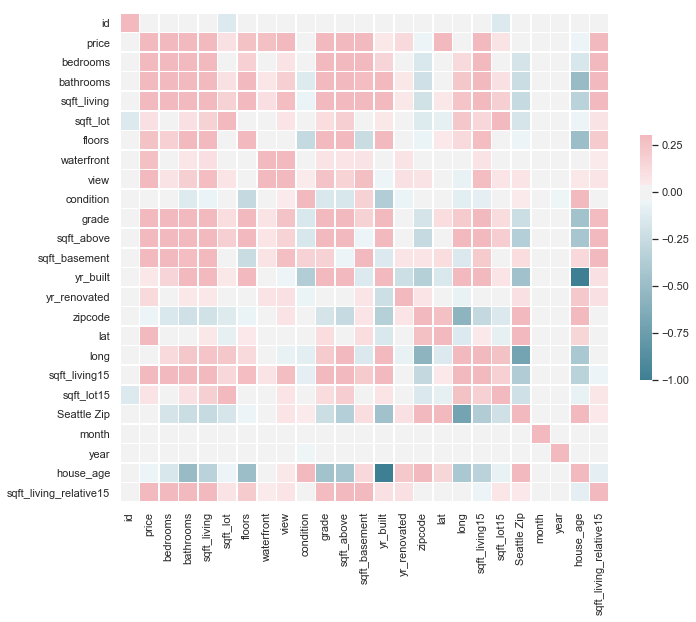

In [20]:
import seaborn as sns

sns.set(style='white')
corr = df.corr()
mask = np.zeros_like(corr,dtype=np.bool)

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={'shrink':.5})

In [21]:
df = df.drop(['long'], axis = 1)   #long/lat highly correlated with zip, remove
df = df.drop(['lat'], axis = 1)
df.head().T

,0,1,2,3,4
id,7.1293e+09,6.4141e+09,5.6315e+09,2.4872e+09,1.9544e+09
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


# Normalizing the Data

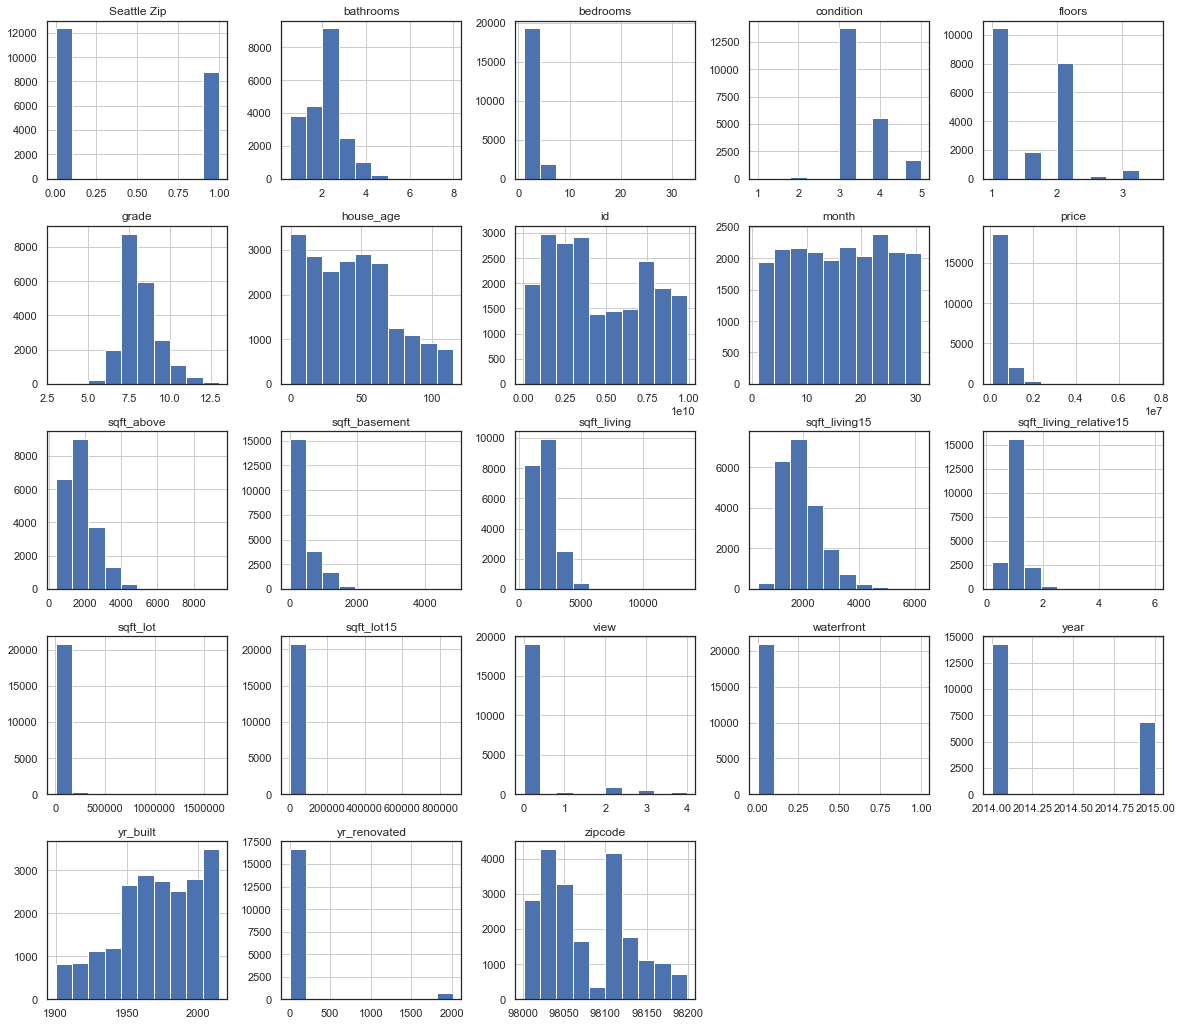

In [22]:
df.hist(figsize=(20,18));

In [80]:
# may want to address nulls prior
# may want to create one hot encoding for possible categorical columns
#standardize data
df_norm = df.copy()
for i in df.columns:
    if i == 'date' or i == 'price':
        pass
    else:
        #df_norm[i] = (df_norm[i] - df_norm[i].mean())/df_norm[i].std()
        df_norm[i] = (df_norm[i] - df_norm[i].mean())/(df_norm[i].max() - df_norm[i].min())
        

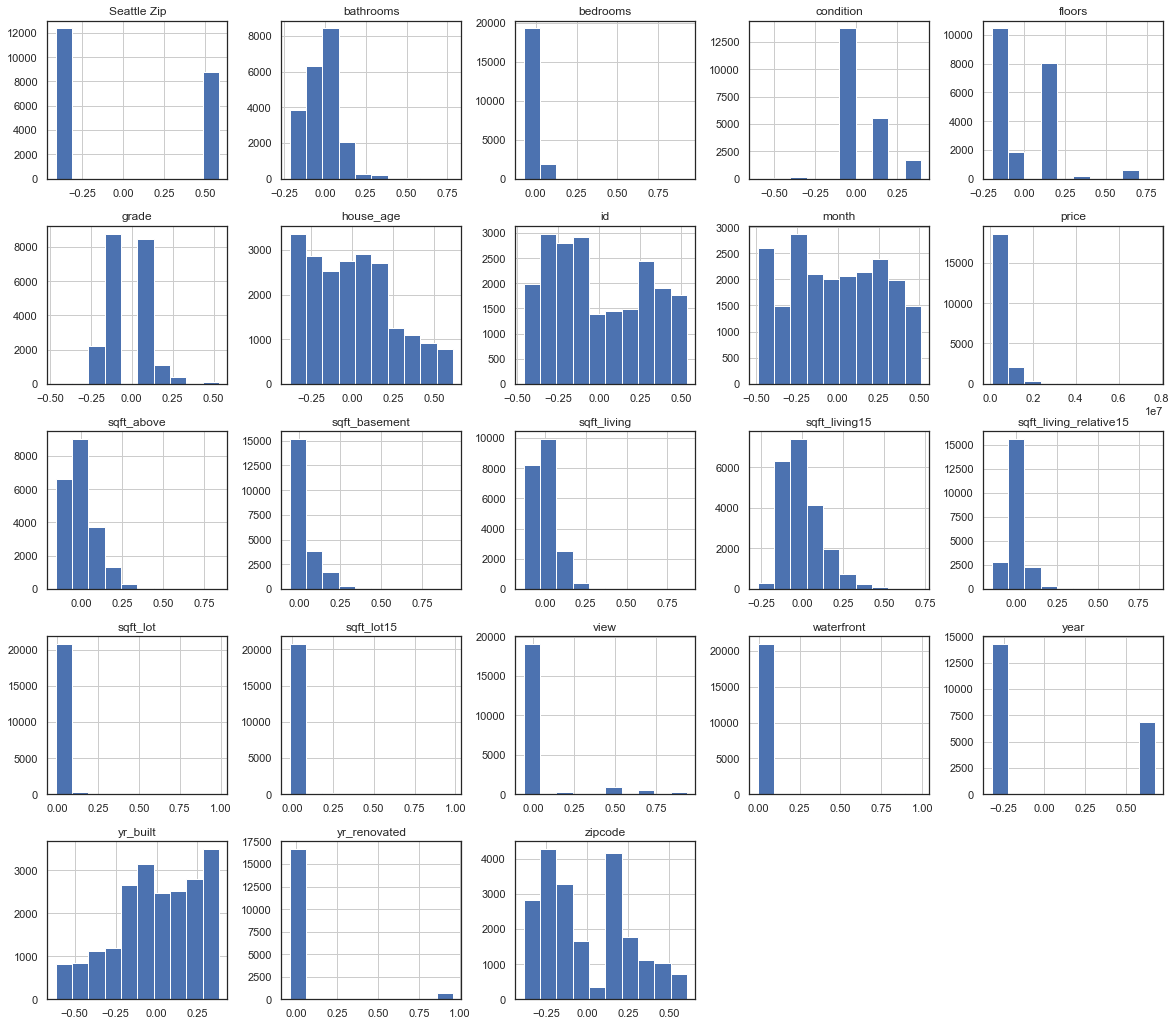

In [81]:
df_norm.hist(figsize = (20, 18));
# checking normalization of data

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


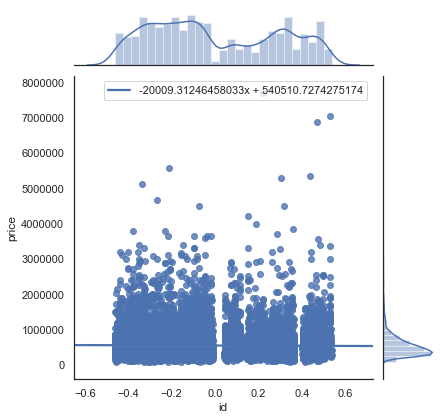

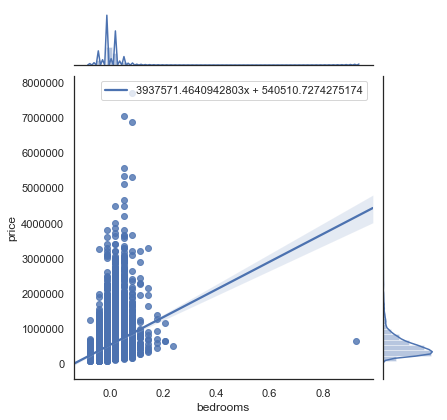

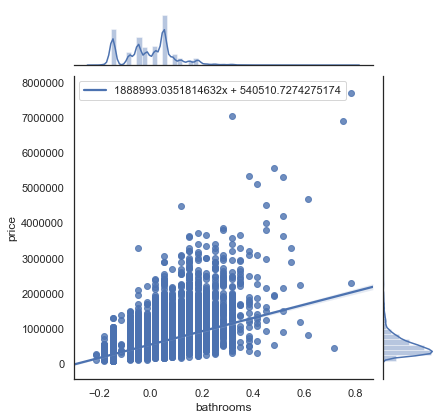

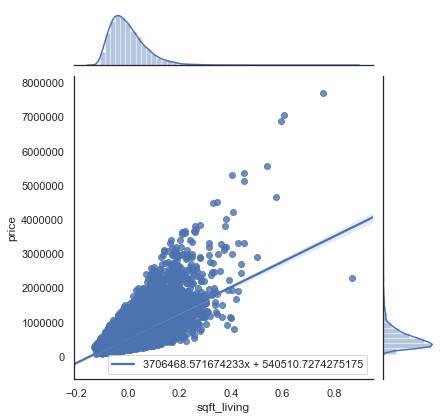

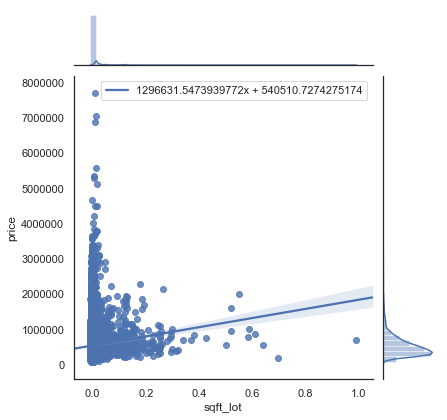

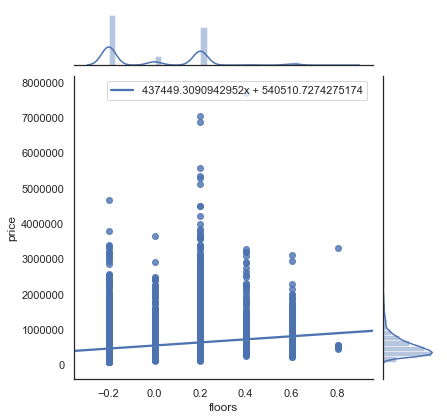

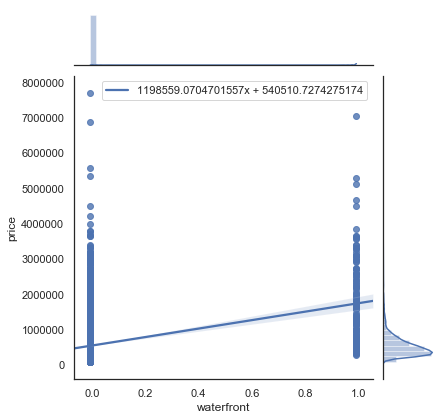

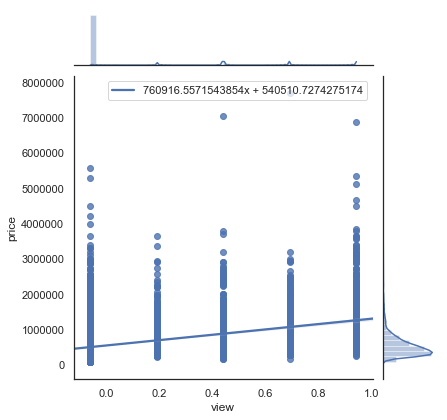

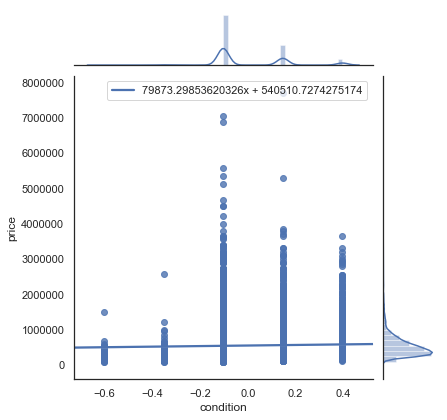

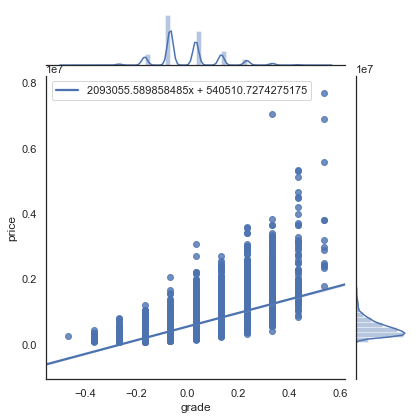

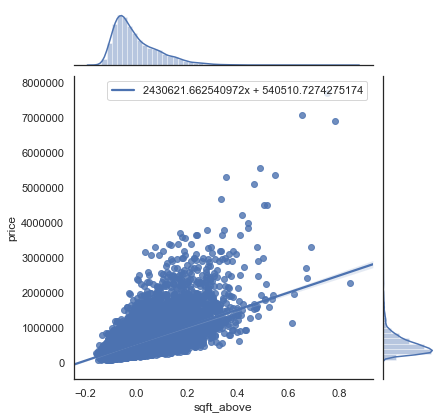

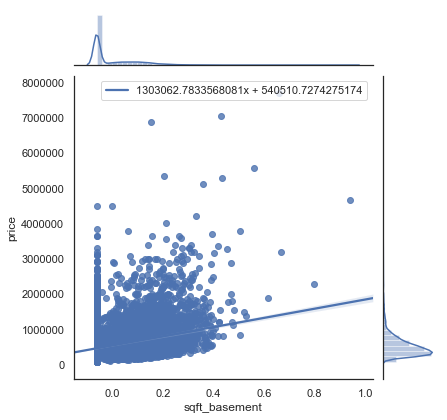

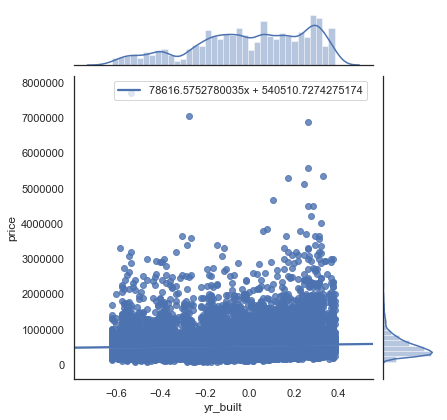

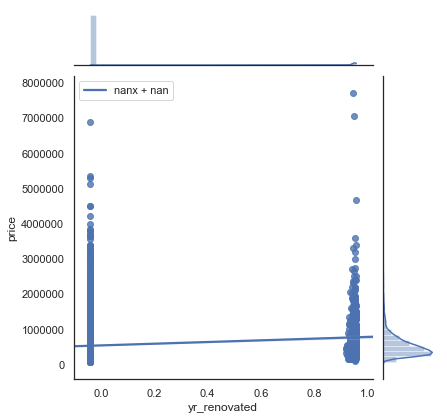

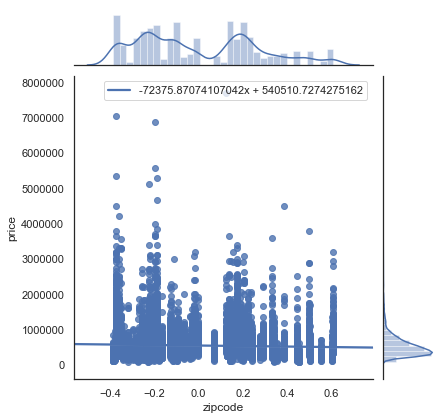

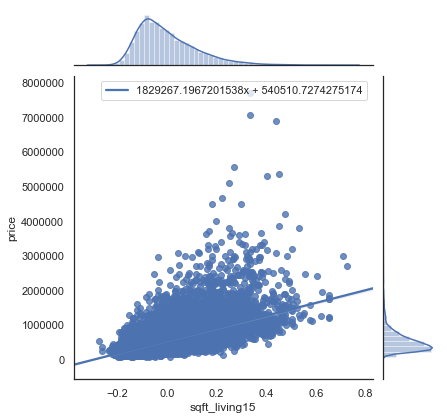

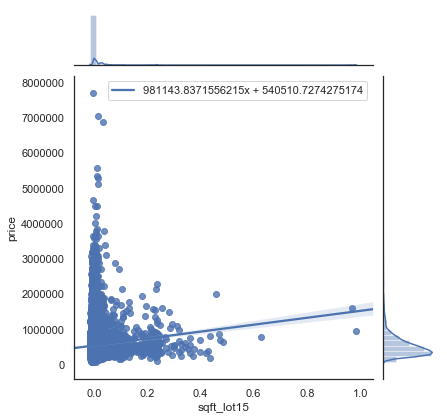

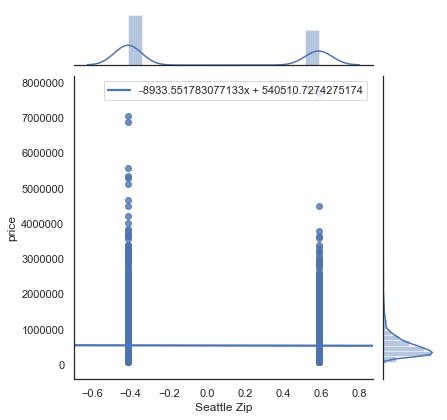

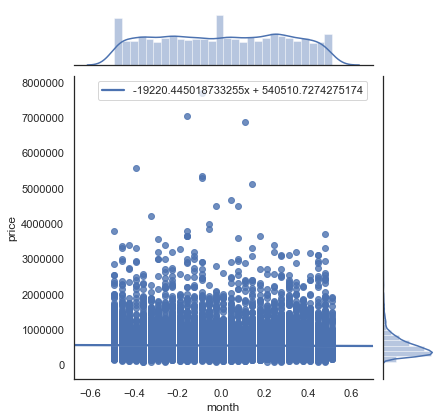

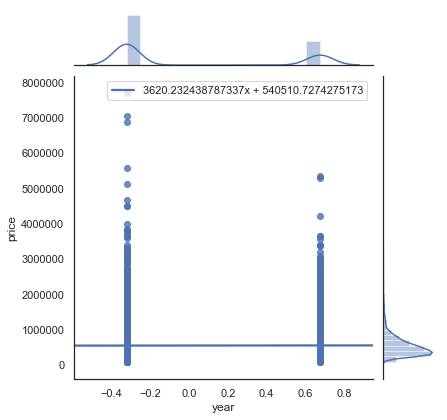

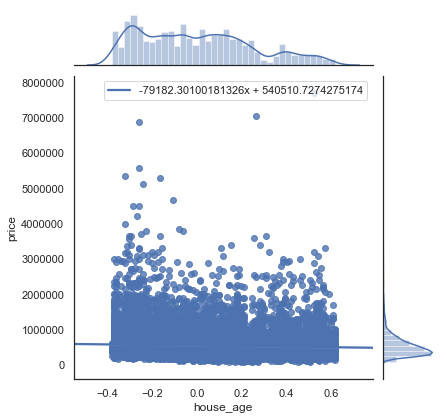

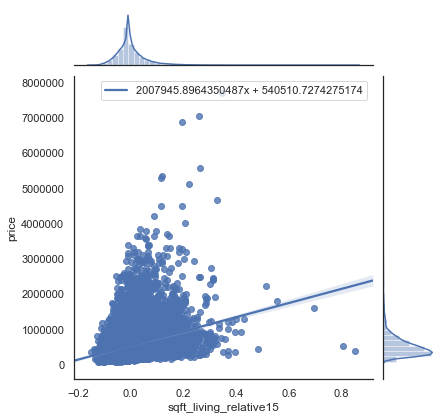

In [82]:
from scipy import stats
for i in df_norm.columns:
    if i == 'price' or i == 'date':
        pass
    else:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_norm[i],df_norm['price'])
        sns.jointplot(x=df_norm[i], y=df_norm['price'], data=df_norm, kind='reg',
                      line_kws={'label':f'{slope}x + {intercept}'})
        plt.legend()
        plt.show()
        

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [116]:
X = df_norm[['sqft_living', 'grade','sqft_living_relative15']]
y = df_norm['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [118]:
y_hat_test[:5]

array([ 77448.81221723, 332859.15802739, 232532.10181554, 617317.88104021,
       196748.59857844])

In [119]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print(train_mse)
print(test_mse)

62209474829.06632
63323915785.68018


In [122]:
train_error = []
test_error = []
mean_train_error = []
mean_test_error = []

In [123]:
test_sizes = list(range(5,95,10))

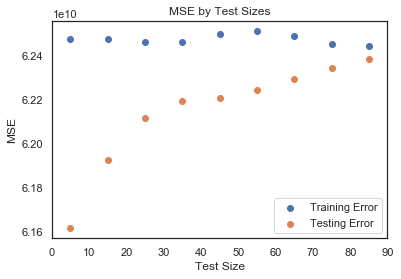

In [124]:
for i in test_sizes:
    for n in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100)
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        y_hat_test = model.predict(X_test)
        train_error.append(mean_squared_error(y_train, y_hat_train))
        test_error.append(mean_squared_error(y_test, y_hat_test))
    mean_train_error.append(np.mean(train_error))
    mean_test_error.append(np.mean(test_error))
plt.scatter(test_sizes, mean_train_error, label = 'Training Error')
plt.scatter(test_sizes, mean_test_error, label = 'Testing Error')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.title('MSE by Test Sizes')
plt.legend()


# K-folds Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
import math

cv_20_results = cross_val_score(model,X,y,cv=20,scoring='neg_mean_squared_error')
cv_20_results


array([-5.44667248e+10, -8.70262568e+10, -6.23068260e+10, -8.20595180e+10,
       -5.81941397e+10, -5.15735741e+10, -8.67985439e+10, -5.64247389e+10,
       -6.96790491e+10, -4.74170118e+10, -5.54286620e+10, -5.63949392e+10,
       -5.74506418e+10, -5.31794228e+10, -6.35276489e+10, -5.61628299e+10,
       -5.68265675e+10, -6.76425093e+10, -7.01843931e+10, -5.96783982e+10])

In [94]:
from numpy.polynomial.polynomial import polyfit
from mpl_toolkits import mplot3d
sqft_living, grade, sqft_living_relative15 = np.split(X_test,3,axis=1)

ls_vars = [sqft_living, grade, sqft_living_relative15]
ls_str_vars = ['sqft_living','grade', 'sqft_living_relative15']

In [95]:
# list index 0, viewing first 5 records
ls_vars[0][:5]

,sqft_living
7811,-0.021330
14284,0.061434
18023,-0.076759
15387,-0.054740
5476,-0.032720


In [96]:
np.shape(ls_vars[0])

(17972, 1)

In [97]:
np.shape(ls_vars[1])

(17972, 1)

In [98]:
type(y_hat_test)

numpy.ndarray

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


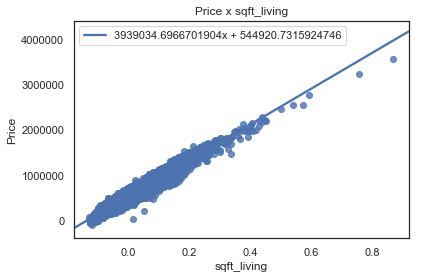

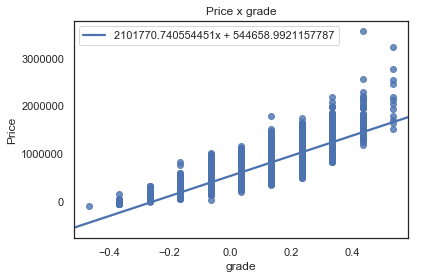

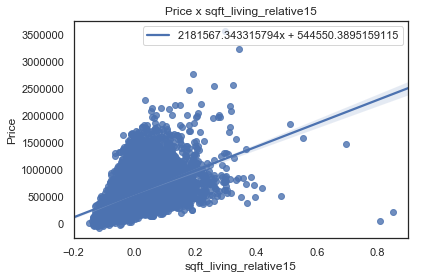

In [99]:
for var, str_var in zip(ls_vars, ls_str_vars):
    arr_var = np.array(var)
    arr_var = np.reshape(arr_var,len(arr_var))

    slope, intercept, r_value, p_value, std_err = stats.linregress(arr_var, y_hat_test)
    fig = sns.regplot(x=var, y=y_hat_test, data=df_norm, line_kws={'label':f'{slope}x + {intercept}'})
    fig.legend()
    fig.set_xlabel(str_var)
    fig.set_ylabel('Price')
    fig.set_title('Price x ' + str_var)
    plt.show()
    

# Most Correlated
Price is most correlated to sqft_living and grade.

In [100]:
df_norm.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Seattle Zip,month,year,house_age,sqft_living_relative15
id,1.000000,-0.015796,0.002487,0.006120,-0.011721,-0.132268,0.019281,-0.002920,0.013028,-0.023186,...,0.022218,-0.010601,-0.011183,-0.003039,-0.138005,0.004745,0.003650,0.009059,-0.022072,-0.014296
price,-0.015796,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,...,0.054459,0.128227,-0.053166,0.586415,0.083192,-0.011958,-0.015026,0.004601,-0.054382,0.300739
bedrooms,0.002487,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,...,0.157017,0.019060,-0.152628,0.392476,0.030479,-0.182952,-0.007251,-0.009025,-0.157150,0.427688
bathrooms,0.006120,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,...,0.508408,0.051736,-0.204306,0.570129,0.088834,-0.242033,-0.006292,-0.025457,-0.508779,0.452675
sqft_living,-0.011721,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,...,0.319461,0.054291,-0.198906,0.756389,0.184466,-0.260747,-0.008611,-0.027311,-0.319874,0.569147
sqft_lot,-0.132268,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,...,0.052768,0.003491,-0.129355,0.143428,0.720649,-0.176211,0.000300,0.004996,-0.052684,0.083201
floors,0.019281,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,...,0.489665,0.003256,-0.058976,0.280294,-0.011545,-0.051862,-0.007095,-0.021690,-0.489977,0.203112
waterfront,-0.002920,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,...,-0.023843,0.077638,0.028152,0.085174,0.030250,0.004834,0.013373,-0.006097,0.023744,0.037007
view,0.013028,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,...,-0.054330,0.098954,0.085097,0.280282,0.072555,0.075024,0.009826,0.000544,0.054335,0.073707
condition,-0.023186,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,...,-0.362107,-0.062261,0.003437,-0.093493,-0.004860,0.038047,-0.004837,-0.044774,0.361368,0.026707


In [101]:
df_narrow = df_norm[['sqft_living','grade','sqft_living_relative15']]

In [102]:
import statsmodels.formula.api as smf

In [103]:
col_names = X
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

# Individual Regression Analysis of Features

In [104]:
for idx, val in enumerate(col_names):
    print('Housing Price ~ ' + val)
    print('----------------------------')
    formula = 'price~' + val
    model = smf.ols(formula=formula, data=df_norm).fit()
    x_new = pd.DataFrame({val:[df_norm[val].min(), df_norm[val].max()]})
    predictions = model.predict(x_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])
    print(predictions)
    print(model.summary())

Housing Price ~ sqft_living
----------------------------
['sqft_living', 0.49326420216689226, 540510.7274275174, 3706468.5716742333, 0.0]
0    5.900170e+04
1    3.765470e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:21:40   Log-Likelihood:            -2.9378e+05
No. Observations:               21143   AIC:                         5.876e+05
Df Residuals:                   21141   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coe

# Multiple Regression Analysis

In [105]:
import statsmodels.api as sm
X_int_sm = sm.add_constant(df_narrow)
model = sm.OLS(df_norm['price'], X_int_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        08:21:40   Log-Likelihood:            -2.9278e+05
No. Observations:               21143   AIC:                         5.856e+05
Df Residuals:                   21139   BIC:                         5.856e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.405e+05   1718.530    314.519      0.000    5.37e+05    5.44e+05
sqft_living             2.806e+06   4.63e+04     60.576      0.000    2.71e+06     2.9e+06
grade                   8.957e+05   2.36e+04     37.955      0.000    8.49e+05    9.42e+05
sqft_living_relative15 -5.559e+05   3.95e+04    -14.069      0.000   -6.33e+05   -4.78e+05
==============================================================================
Omnibus:                    16406.026   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           953656.093
Skew:                           3.247   Prob(JB):                         0.00
Kurtosis:                      35.255   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Run Multiple Linear Regression on Selected Features and Calc Price from User Inputs

In [106]:
model = LinearRegression()

In [107]:
model.fit(df_narrow, df_norm['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
print(model.coef_)
print(model.intercept_)

[2805781.56364024  895679.20659841 -555857.616105  ]
540510.7274275175


In [113]:
def calc_price(input_features, str_features, intercept=model.intercept_, model_coefs=model.coef_):
    """Function to calculate the price of a home based on selected features."""
    final_price = []
    #for loop to create price estimate
    for feature, coef, str_feature in zip(input_features, model_coefs, str_features):
        #normalize feature
        #norm_feat = (feature - np.mean(df[str_feature]))/df[str_feature].std()
        norm_feat = (feature - df[str_feature].mean())/(df[str_feature].max() - df[str_feature].min())
        #append feature times coefficient to list to sum
        print(norm_feat)
        final_price.append(norm_feat * coef)
    final_price.append(intercept)
    return sum(final_price)

In [114]:
input_features = [1000, 7, .8]
str_features = ['sqft_living','grade','sqft_living_relative15']
print(calc_price(input_features,str_features))

-0.08207446699053426
-0.06582793359504331
-0.04355458158043724
275477.1356532086
